In [107]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

from sklearn import tree, ensemble, metrics, cross_validation, externals

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [108]:
df = pd.read_csv('dataset-17-ames-housing.csv')

In [109]:
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,...,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,...,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,...,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,...,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,...,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,...,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,...,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,...,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,...,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,...,4,2006,WD,Normal,170000


In [110]:
df.columns

Index([u'Order', u'PID', u'MS SubClass', u'MS Zoning', u'Lot Frontage',
       u'Lot Area', u'Street', u'Alley', u'Lot Shape', u'Land Contour',
       u'Utilities', u'Lot Config', u'Land Slope', u'Neighborhood',
       u'Condition 1', u'Condition 2', u'Bldg Type', u'House Style',
       u'Overall Qual', u'Overall Cond', u'Year Built', u'Year Remod/Add',
       u'Roof Style', u'Roof Matl', u'Exterior 1st', u'Exterior 2nd',
       u'Mas Vnr Type', u'Mas Vnr Area', u'Exter Qual', u'Exter Cond',
       u'Foundation', u'Bsmt Qual', u'Bsmt Cond', u'Bsmt Exposure',
       u'BsmtFin Type 1', u'BsmtFin SF 1', u'BsmtFin Type 2', u'BsmtFin SF 2',
       u'Bsmt Unf SF', u'Total Bsmt SF', u'Heating', u'Heating QC',
       u'Central Air', u'Electrical', u'1st Flr SF', u'2nd Flr SF',
       u'Low Qual Fin SF', u'Gr Liv Area', u'Bsmt Full Bath',
       u'Bsmt Half Bath', u'Full Bath', u'Half Bath', u'Bedroom AbvGr',
       u'Kitchen AbvGr', u'Kitchen Qual', u'TotRms AbvGrd', u'Functional',
       u'Fi

## EDA & Data Cleansing

In [111]:
df [['Order', 'Lot Area', '1st Flr SF', '2nd Flr SF', 'SalePrice' ]]

,Order,Lot Area,1st Flr SF,2nd Flr SF,SalePrice
0,1,31770,1656,0,215000
1,2,11622,896,0,105000
2,3,14267,1329,0,172000
3,4,11160,2110,0,244000
4,5,13830,928,701,189900
...,...,...,...,...,...
2925,2926,7937,1003,0,142500
2926,2927,8885,902,0,131000
2927,2928,10441,970,0,132000
2928,2929,10010,1389,0,170000


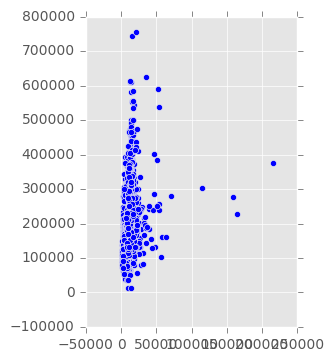

In [112]:
x = df['Lot Area']
y = df['SalePrice']
fig = plt.figure()

ax2 = fig.add_subplot(121)
ax2.scatter(x,y)

In [113]:
df.columns = df.columns.str.replace(' ', '_')

In [114]:
df.columns

Index([u'Order', u'PID', u'MS_SubClass', u'MS_Zoning', u'Lot_Frontage',
       u'Lot_Area', u'Street', u'Alley', u'Lot_Shape', u'Land_Contour',
       u'Utilities', u'Lot_Config', u'Land_Slope', u'Neighborhood',
       u'Condition_1', u'Condition_2', u'Bldg_Type', u'House_Style',
       u'Overall_Qual', u'Overall_Cond', u'Year_Built', u'Year_Remod/Add',
       u'Roof_Style', u'Roof_Matl', u'Exterior_1st', u'Exterior_2nd',
       u'Mas_Vnr_Type', u'Mas_Vnr_Area', u'Exter_Qual', u'Exter_Cond',
       u'Foundation', u'Bsmt_Qual', u'Bsmt_Cond', u'Bsmt_Exposure',
       u'BsmtFin_Type_1', u'BsmtFin_SF_1', u'BsmtFin_Type_2', u'BsmtFin_SF_2',
       u'Bsmt_Unf_SF', u'Total_Bsmt_SF', u'Heating', u'Heating_QC',
       u'Central_Air', u'Electrical', u'1st_Flr_SF', u'2nd_Flr_SF',
       u'Low_Qual_Fin_SF', u'Gr_Liv_Area', u'Bsmt_Full_Bath',
       u'Bsmt_Half_Bath', u'Full_Bath', u'Half_Bath', u'Bedroom_AbvGr',
       u'Kitchen_AbvGr', u'Kitchen_Qual', u'TotRms_AbvGrd', u'Functional',
       u'Fi

## Creating a Train and Test Set

In [119]:
train_df = df.sample(frac = .6, random_state = 0)
test_df = df.drop(train_df.index)

In [120]:
#Second way 
#X  = df [['Lot_Frontage', 'BsmtFin_SF_1', 'Garage_Area', 'Garage_Cars', 'Pool_Area', 'Misc_Val', 'Low_Qual_Fin_SF', 'Total_Bsmt_SF', 'Bsmt_Unf_SF', 'Year_Built', 'Lot_Area', 'Mas_Vnr_Area', 'Gr_Liv_Area']]
#Y = df.SalePrice


#train_X, test_X, train_y, test_y = cross_validation.train_test_split(X, y, train_size = .6, random_state = 0)

## Correlation

In [122]:
train_df [['Order', 'Lot_Area', '1st_Flr_SF', '2nd_Flr_SF']].corr()

,Order,Lot_Area,1st_Flr_SF,2nd_Flr_SF
Order,1.000000,0.043054,0.015723,-0.007275
Lot_Area,0.043054,1.000000,0.346964,0.057655
1st_Flr_SF,0.015723,0.346964,1.000000,-0.244141
2nd_Flr_SF,-0.007275,0.057655,-0.244141,1.000000


In [127]:
corr_df = df.corr()
corr_df['SalePrice'].order(ascending = False)

C:\Users\brandon.lam\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


SalePrice         1.000000
Overall_Qual      0.799262
Gr_Liv_Area       0.706780
Garage_Cars       0.647877
Garage_Area       0.640401
                    ...   
MS_SubClass      -0.085092
Overall_Cond     -0.101697
Kitchen_AbvGr    -0.119814
Enclosed_Porch   -0.128787
PID              -0.246521
Name: SalePrice, dtype: float64

In [124]:
#Linear regression of Lot_Area + Total_Bsmt_SF _ Gr Live Area 

smf.ols(formula = 'SalePrice ~ Lot_Area + Total_Bsmt_SF + Gr_Liv_Area', data = train_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     1101.
Date:                Thu, 09 Feb 2017   Prob (F-statistic):               0.00
Time:                        19:51:57   Log-Likelihood:                -21398.
No. Observations:                1757   AIC:                         4.280e+04
Df Residuals:                    1753   BIC:                         4.283e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept     -2.559e+04   3813.382     -6.709      0.000     -3.31e+04 -1.81e+04
Lot_Area          0.0798      0.187      0.426      0.670        -0.287     0.447
Total_Bsmt_SF    71.4689      2.929     24.397      0.000        65.723    77.215
Gr_Liv_Area      87.4185      2.531     34.543      0.000        82.455    92.382
==============================================================================
Omnibus:                      726.677   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32438.345
Skew:                          -1.200   Prob(JB):                         0.00
Kurtosis:                      23.913   Cond. No.                     4.04e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [126]:
smf.ols(formula = 'SalePrice ~ Lot_Frontage + BsmtFin_SF_1 + Garage_Area + Garage_Cars + Pool_Area + Misc_Val + Low_Qual_Fin_SF+ Total_Bsmt_SF + Bsmt_Unf_SF + Year_Built + Lot_Area + Mas_Vnr_Area + Gr_Liv_Area', data = train_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     406.0
Date:                Thu, 09 Feb 2017   Prob (F-statistic):               0.00
Time:                        19:52:41   Log-Likelihood:                -17411.
No. Observations:                1454   AIC:                         3.485e+04
Df Residuals:                    1440   BIC:                         3.492e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept       -1.066e+06   7.91e+04    -13.472      0.000     -1.22e+06 -9.11e+05
Lot_Frontage        6.2926     58.914      0.107      0.915      -109.273   121.858
BsmtFin_SF_1       24.0428      7.226      3.327      0.001         9.868    38.218
Garage_Area        34.5259     11.065      3.120      0.002        12.820    56.232
Garage_Cars      8447.1573   3186.678      2.651      0.008      2196.130  1.47e+04
Pool_Area          74.7084     33.661      2.219      0.027         8.678   140.739
Misc_Val          -17.9777      1.662    -10.817      0.000       -21.238   -14.717
Low_Qual_Fin_SF   -25.5760     23.333     -1.096      0.273       -71.345    20.193
Total_Bsmt_SF      32.9000      7.339      4.483      0.000        18.503    47.297
Bsmt_Unf_SF         1.4665      6.935      0.211      0.833       -12.138    15.070
Year_Built        534.1310     40.849     13.076      0.000       454.001   614.261
Lot_Area            0.8817      0.276      3.192      0.001         0.340     1.424
Mas_Vnr_Area       41.4453      6.682      6.203      0.000        28.338    54.552
Gr_Liv_Area        70.7861      2.682     26.390      0.000        65.524    76.048
==============================================================================
Omnibus:                      400.434   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17690.251
Skew:                          -0.495   Prob(JB):                         0.00
Kurtosis:                      20.059   Cond. No.                     8.51e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

While we have a high r2, by having so many features, it is difficult to pinpoint which feature is contributing most to the fit

## Lasso & Regularization 

In [129]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

df['Lot_Area'] = np.random.uniform(0, 1, len(df)) <= .75
df['SalePrice'] = pd.Factor(iris.target, iris.target_names)
df.head()

train, test = df[df['Lot_Area']==True], df[df['Lot_Area']==False]

features = df.columns[:4]
clf = RandomForestClassifier(n_jobs=2)
y, _ = pd.factorize(train['SalePrice'])
clf.fit(train[features], y)

preds = iris.target_names[clf.predict(test[features])]
pd.crosstab(test['SalePrice'], preds, rownames=['actual'], colnames=['preds'])

AttributeError: 'module' object has no attribute 'Factor'